In [1]:
# %load ../jupyter_setup.txt
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False 

# 1. Imports

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import numpy as np
import pandas as pd

import rioxarray as rxr
import geopandas as gpd

import pylandstats as pls
from src.demo.plot_settings import ps_defaults, label_subplots, set_dim


ps_defaults(use_tex=True)
import tqdm

from src.geograph import GeoGraph
from src.geotimeline import GeoGraphTimeline
from src.constants import DATA_DIR, UTM35N, ROIS

# 2. Loading Chernobyl Landcover data (ESA CCI)

For this demonstration we will use the ESA CCI landcover dataset as an example to illustrate how
geographs enable us to reproduce the same metrics that traditional fragmentation software (pylandstats, fragstats)
produce.

In this demo we will look specifically at the Chernobyl exclusion zone, so we reproject the satellite data to the right coordinate
system (UTM35N) and clip to the CEZ region of interest).

In [3]:
# Parse geotif landcover data
chernobyl_path = lambda year: DATA_DIR / "chernobyl" / "esa_cci" / f"esa_cci_{year}_chernobyl.tif" 

# Parse ROIS
rois = gpd.read_file(ROIS)
cez = rois[rois["name"] == "Chernobyl Exclusion Zone"]
pez = rois[rois["name"] == "Polesie Exclusion Zone"]
e30 = rois[rois["name"] == "E+30"]
e60 = rois[rois["name"] == "E+60"]

For convenience, let us also define certain groups of land cover classes from the ESA CCI data (c.f. Appendix of this notebook for a full list of classes)

In [4]:
cropland = [10, 20]
deciduous_forest = [60, 61, 62, 80, 81, 82]
evergreen_forest = [70, 71, 72]
wetlands = [160, 170, 180]
urban = [190]
water = [210]

Next, let us load the raster data into memory, clip to the regions of interest and reproject to UTM35N

In [5]:
def clip_and_reproject(xrdata, clip_geometry=None, to_crs=UTM35N, x_res=300, y_res=300):
    
    if clip_geometry is not None:
        clipped_data = xrdata.rio.clip(clip_geometry)
    else:
        clipped_data = xrdata
        
    if to_crs is not None:
        reprojected_data = clipped_data.rio.reproject(to_crs, resolution=(x_res, y_res))
    else:
        reprojected_data = clipped_data
    
    return reprojected_data

In [6]:
# Loading raster data (for pylandstats and graph creation)
years = range(2000, 2015)
zones = [cez, pez, e30, e60]


rasters = {zone.name.iloc[0]: {year: clip_and_reproject(rxr.open_rasterio(chernobyl_path(year)), 
                                    clip_geometry=zone.geometry) 
                               for year in years}
           for zone in zones}

## 2.1 Loading the Chernobyl Exclusion Zone (CEZ)

Next, let us load the geographs for the chernobyl exclusion zone and its surroundings for all
years from 2000 to 2014. To save you some time, we have pre-computed them and stored them already,
so we can simply load them from disk. 

If you would nontheless like to recreate them from the original raster data, which we loaded above,
the code to do so is commented below. Simply uncomment and run to recreate the graphs from scratch.

In [7]:
# Demo path includes pre-loaded graphs for faster loading
demo_path = DATA_DIR / "chernobyl" / "graphs"

In [8]:
# Loading pre-created geographs from disk
cez_graphs = {year: GeoGraph(demo_path / f"cez_graph_{year}.gz")
             for year in years}

## To recreate the graphs from scratch, run this: (~2-3s per graph)
# cez_graphs = {}
# for year, raster in rasters["Chernobyl Exclusion Zone"].items():
#     print(f"Analysing year {year}")
#     cez_graphs[year] = GeoGraph(data=raster.data.squeeze(), 
#                              transform=raster.rio.transform(), 
#                              mask=raster.data.squeeze() > 0,
#                              crs=UTM35N, 
#                              connectivity=8)

Graph successfully loaded with 1924 nodes and 4912 edges.
Graph successfully loaded with 1931 nodes and 4918 edges.
Graph successfully loaded with 1929 nodes and 4897 edges.
Graph successfully loaded with 1936 nodes and 4911 edges.
Graph successfully loaded with 1953 nodes and 4953 edges.
Graph successfully loaded with 1960 nodes and 4973 edges.
Graph successfully loaded with 2004 nodes and 5113 edges.
Graph successfully loaded with 1996 nodes and 5141 edges.
Graph successfully loaded with 1992 nodes and 5119 edges.
Graph successfully loaded with 1994 nodes and 5108 edges.
Graph successfully loaded with 1988 nodes and 5080 edges.
Graph successfully loaded with 2003 nodes and 5131 edges.
Graph successfully loaded with 1998 nodes and 5119 edges.
Graph successfully loaded with 2003 nodes and 5140 edges.
Graph successfully loaded with 1999 nodes and 5117 edges.


In [9]:
# Loading raster data into pylandstats
cez_landscapes = {year: pls.Landscape(rasters["Chernobyl Exclusion Zone"][year].data.squeeze(), 
                                  res=(300,300) , 
                                  nodata=0) 
                  for year in years}

## 2.2 Loading the Polesia Exclusion Zone (PEZ)

In [10]:
# Loading pre-created geographs from disk
pez_graphs = {year: GeoGraph(demo_path / f"pez_graph_{year}.gz")
             for year in years}

## To recreate the graphs from scratch, run this: (~2-3s per graph)
# pez_graphs = {}
# for year, raster in rasters["Polesie Exclusion Zone"].items():
#     print(f"Analysing year {year}")
#     pez_graphs[year] = GeoGraph(data=raster.data.squeeze(), 
#                              transform=raster.rio.transform(), 
#                              mask=raster.data.squeeze() > 0,
#                              crs=UTM35N, 
#                              connectivity=8)

Graph successfully loaded with 1942 nodes and 5223 edges.
Graph successfully loaded with 1940 nodes and 5222 edges.
Graph successfully loaded with 1940 nodes and 5227 edges.
Graph successfully loaded with 1933 nodes and 5210 edges.
Graph successfully loaded with 1931 nodes and 5201 edges.
Graph successfully loaded with 1936 nodes and 5209 edges.
Graph successfully loaded with 1937 nodes and 5215 edges.
Graph successfully loaded with 1932 nodes and 5184 edges.
Graph successfully loaded with 1920 nodes and 5152 edges.
Graph successfully loaded with 1905 nodes and 5099 edges.
Graph successfully loaded with 1908 nodes and 5098 edges.
Graph successfully loaded with 1907 nodes and 5091 edges.
Graph successfully loaded with 1907 nodes and 5094 edges.
Graph successfully loaded with 1912 nodes and 5111 edges.
Graph successfully loaded with 1924 nodes and 5147 edges.


In [11]:
# Loading raster data into pylandstats
pez_landscapes = {year: pls.Landscape(rasters["Polesie Exclusion Zone"][year].data.squeeze(), 
                                  res=(300,300) , 
                                  nodata=0) 
                  for year in years}

## 2.3 Loading the 30 km surroundings

In [12]:
# Loading pre-created geographs from disk
e30_graphs = {year: GeoGraph(demo_path / f"e30_graph_{year}.gz")
             for year in years}

## To recreate the graphs from scratch, run this: (~25s per graph)
# e30_graphs = {}
# for year, raster in rasters["E+30"].items():
#     print(f"Analysing year {year}")
#     e30_graphs[year] = GeoGraph(data=raster.data.squeeze(), 
#                              transform=raster.rio.transform(), 
#                              mask=raster.data.squeeze() > 0,
#                              crs=UTM35N, 
#                              connectivity=8)
    

Graph successfully loaded with 8468 nodes and 20612 edges.
Graph successfully loaded with 8484 nodes and 20644 edges.
Graph successfully loaded with 8473 nodes and 20595 edges.
Graph successfully loaded with 8478 nodes and 20577 edges.
Graph successfully loaded with 8499 nodes and 20633 edges.
Graph successfully loaded with 8480 nodes and 20547 edges.
Graph successfully loaded with 8500 nodes and 20625 edges.
Graph successfully loaded with 8512 nodes and 20649 edges.
Graph successfully loaded with 8501 nodes and 20604 edges.
Graph successfully loaded with 8485 nodes and 20568 edges.
Graph successfully loaded with 8504 nodes and 20654 edges.
Graph successfully loaded with 8507 nodes and 20649 edges.
Graph successfully loaded with 8507 nodes and 20647 edges.
Graph successfully loaded with 8510 nodes and 20663 edges.
Graph successfully loaded with 8514 nodes and 20658 edges.


In [13]:
# Loading raster data into pylandstats
e30_landscapes = {year: pls.Landscape(rasters["E+30"][year].data.squeeze(), 
                                  res=(300,300) , 
                                  nodata=0) 
                  for year in years}

## 2.3 Plot the data

Let's plot a sample region for the year 2000 for each of the regions to see that we correctly loaded the data

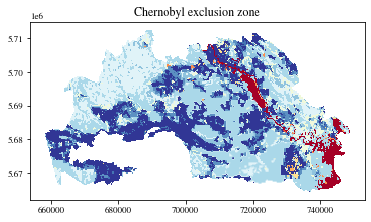

In [14]:
cez_graphs[2000].df.plot("class_label")
plt.title("Chernobyl exclusion zone");

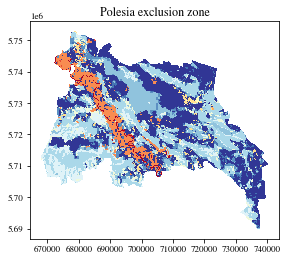

In [15]:
pez_graphs[2000].df.plot("class_label")
plt.title("Polesia exclusion zone");

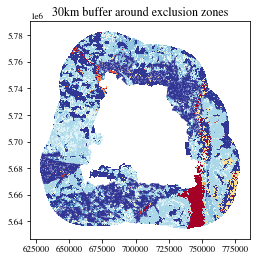

In [16]:
e30_graphs[2000].df.plot("class_label")
plt.title("30km buffer around exclusion zones");

# 3. Metrics calculation

In [17]:
cez_graph_timestack = GeoGraphTimeline(cez_graphs)
pez_graph_timestack = GeoGraphTimeline(pez_graphs)
e30_graph_timestack = GeoGraphTimeline(e30_graphs)

In [18]:
# Calculate pylandstats shannon diversity indices for entire landscapes
cez_pls_shannon = [cez_landscapes[year].shannon_diversity_index() for year in years]
pez_pls_shannon = [pez_landscapes[year].shannon_diversity_index() for year in years]
e30_pls_shannon = [e30_landscapes[year].shannon_diversity_index() for year in years]

In [19]:
# Calculate pylandstats effective mesh size for class 100 (mixed forest and shrub lands)
cez_pls_effm = [cez_landscapes[year].effective_mesh_size(100) for year in years]
pez_pls_effm = [pez_landscapes[year].effective_mesh_size(100) for year in years]
e30_pls_effm = [e30_landscapes[year].effective_mesh_size(100) for year in years]

In [20]:
# Calculate pylandstats mean fractal dimension for class 100 (mixed forest and shrub lands)
cez_pls_fracdim = [cez_landscapes[year].fractal_dimension_mn(100) for year in years]
pez_pls_fracdim = [pez_landscapes[year].fractal_dimension_mn(100) for year in years]
e30_pls_fracdim = [e30_landscapes[year].fractal_dimension_mn(100) for year in years]

In [21]:
# Calculate time-series patch metrics for geographs
cez_patch_metrics =  cez_graph_timestack.get_patch_metrics("mean")
pez_patch_metrics =  pez_graph_timestack.get_patch_metrics("mean")
e30_patch_metrics =  e30_graph_timestack.get_patch_metrics("mean")

cez_patch_metrics_std =  cez_graph_timestack.get_patch_metrics("std")
pez_patch_metrics_std =  pez_graph_timestack.get_patch_metrics("std")
e30_patch_metrics_std =  e30_graph_timestack.get_patch_metrics("std")

In [23]:
import xarray as xr
# Load pre-computed wetland habitats
wetlands_0km_component_isolation = xr.open_dataset(DATA_DIR / "chernobyl"/ "wetlands" / "cez_wetlands_0km.ncdf").to_array().squeeze()
wetlands_1km_component_isolation = xr.open_dataset(DATA_DIR / "chernobyl"/ "wetlands" / "cez_wetlands_1km.ncdf").to_array().squeeze()
wetlands_5km_component_isolation = xr.open_dataset(DATA_DIR / "chernobyl"/ "wetlands" / "cez_wetlands_5km.ncdf").to_array().squeeze()
wetlands_10km_component_isolation = xr.open_dataset(DATA_DIR / "chernobyl"/ "wetlands" / "cez_wetlands_10km.ncdf").to_array().squeeze()
wetlands_20km_component_isolation = xr.open_dataset(DATA_DIR / "chernobyl"/ "wetlands" / "cez_wetlands_20km.ncdf").to_array().squeeze()

# Warning - computation of all edges takes a long time (~tens of minutes)

#cez_graph_timestack.add_habitat("wetlands (0 km)", valid_classes=wetlands, max_travel_distance=0)
#cez_graph_timestack.habitats["wetlands (0 km)"].get_metric("avg_component_isolation")
#cez_graph_timestack.habitats["wetlands (0 km)"].get_metric("avg_component_isolation").to_netcdf("./cez_wetlands_0km.ncdf")

#cez_graph_timestack.add_habitat("wetlands (1 km)", valid_classes=wetlands, max_travel_distance=1e3)
#cez_graph_timestack.habitats["wetlands (1 km)"].get_metric("avg_component_isolation")
#cez_graph_timestack.habitats["wetlands (1 km)"].get_metric("avg_component_isolation").to_netcdf("./cez_wetlands_1km.ncdf")

#cez_graph_timestack.add_habitat("wetlands (5 km)", valid_classes=wetlands, max_travel_distance=5e3)
#cez_graph_timestack.habitats["wetlands (5 km)"].get_metric("avg_component_isolation")
#cez_graph_timestack.habitats["wetlands (5 km)"].get_metric("avg_component_isolation").to_netcdf("./cez_wetlands_5km.ncdf")

#cez_graph_timestack.add_habitat("wetlands (10 km)", valid_classes=wetlands, max_travel_distance=10e3)
#cez_graph_timestack.habitats["wetlands (10 km)"].get_metric("avg_component_isolation")
#cez_graph_timestack.habitats["wetlands (10 km)"].get_metric("avg_component_isolation").to_netcdf("./cez_wetlands_10km.ncdf")

#cez_graph_timestack.add_habitat("wetlands (20 km)", valid_classes=wetlands, max_travel_distance=20e3)
#cez_graph_timestack.habitats["wetlands (20 km)"].get_metric("avg_component_isolation")
#cez_graph_timestack.habitats["wetlands (20 km)"].get_metric("avg_component_isolation").to_netcdf("./cez_wetlands_20km.ncdf")

In [25]:
# Helper function with boilerplate code for plotting graph metrics
plot_scale_factor = 1.8  # To scale plot sizes for report 
def plot_graph_metrics(ax, metric, 
                       class_value=None, 
                       plot_scale_factor=plot_scale_factor, 
                       marker="*", 
                       linewidth=1, 
                       conversion_factor=1,
                       markersize=3):
    
    ax.plot(cez_graph_timestack.times, 
            cez_graph_timestack.get_metric(metric, class_value) * conversion_factor, 
            linewidth = linewidth * plot_scale_factor,
            linestyle="dashed",
            color="C0",
            marker=marker,
            markersize=markersize * plot_scale_factor,
            )
    
    ax.plot(pez_graph_timestack.times, 
         pez_graph_timestack.get_metric(metric, class_value) * conversion_factor, 
         linewidth = linewidth * plot_scale_factor,
         linestyle="dashed",
         color="C1",
         marker=marker,
         markersize=markersize * plot_scale_factor,
         )
    
    ax.plot(e30_graph_timestack.times, 
        e30_graph_timestack.get_metric(metric, class_value) * conversion_factor, 
        linewidth = linewidth * plot_scale_factor,
        linestyle="dashed",
        color="C2",
        marker=marker,
        markersize=markersize * plot_scale_factor,
        )

In [26]:
# Helper function with boilerplate code for plotting pylandstats metrics
def plot_pls_metric(ax, 
                    metrics, 
                    plot_scale_factor=plot_scale_factor, 
                    marker="x", 
                    linewidth=1, 
                    markersize=4):
    
    cez_vals, pez_vals, e30_vals = metrics
    
    ax.plot(cez_graph_timestack.times, 
         cez_vals,
         linewidth = linewidth * plot_scale_factor,
         linestyle="dashed",
         color="C0",
         marker=marker,
         markersize=markersize * plot_scale_factor)

    ax.plot(pez_graph_timestack.times, 
         pez_vals,
         linewidth = linewidth * plot_scale_factor,
         linestyle="dashed",
         color="C1",
         marker=marker,
         markersize=markersize * plot_scale_factor)

    ax.plot(e30_graph_timestack.times, 
        e30_vals,
        linewidth = linewidth * plot_scale_factor,
        linestyle="dashed",
        color="C2",
        marker=marker,
        markersize=markersize * plot_scale_factor,)

In [27]:
colors = sns.color_palette("rocket_r").as_hex()
colors

['#f6b48f', '#f37651', '#e13342', '#ad1759', '#701f57', '#35193e']

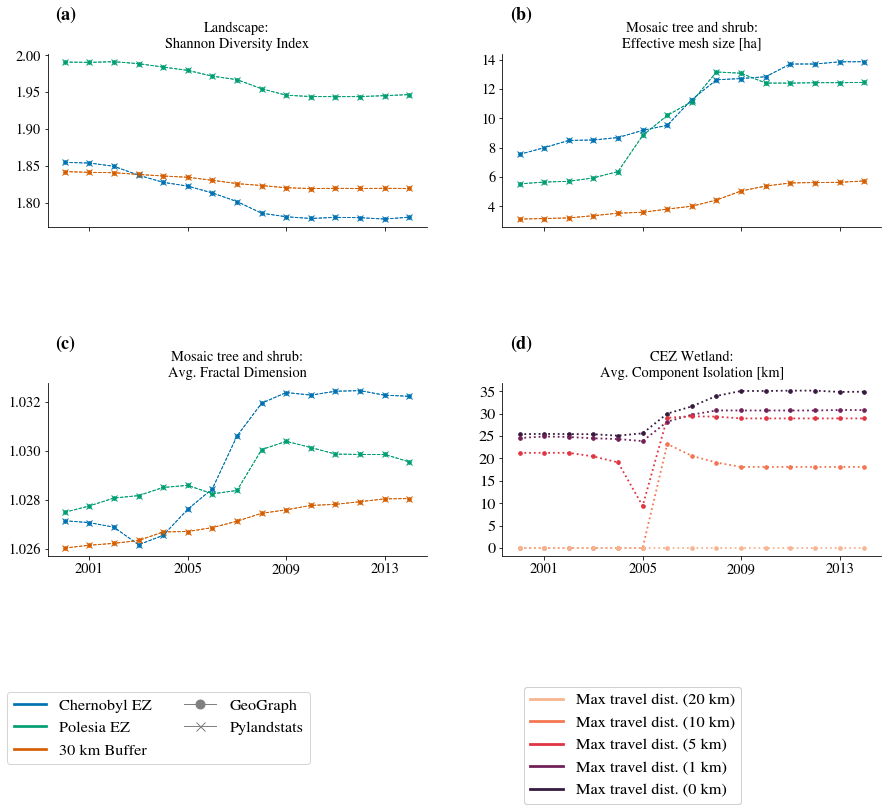

In [28]:
fig, ax = plt.subplots(2, 2, sharex="col")
set_dim(fig, fraction_of_line_width=plot_scale_factor)
colors = sns.color_palette("rocket_r").as_hex()

# Top left plot
ax[0,0].set_title("Landscape:\nShannon Diversity Index", fontsize=8*plot_scale_factor)
plot_graph_metrics(ax[0,0], 
                   "shannon_diversity_index", 
                   marker="o",
                   plot_scale_factor=plot_scale_factor,
                   linewidth=0.5,
                   markersize = 2)
plot_pls_metric(ax[0,0],
                metrics=[cez_pls_shannon, pez_pls_shannon, e30_pls_shannon], 
                plot_scale_factor=plot_scale_factor,
                linewidth=0.5,
                markersize=3
               )

# Top right plot
ax[0,1].set_title("Mosaic tree and shrub:\nEffective mesh size [ha]", fontsize=8*plot_scale_factor)
plot_graph_metrics(ax[0,1], 
                   "effective_mesh_size", 
                   class_value=100, 
                   conversion_factor = 0.0001,
                   marker="o",
                   plot_scale_factor=plot_scale_factor,
                   linewidth=0.5,
                   markersize = 2)
plot_pls_metric(ax[0,1], 
                [cez_pls_effm, pez_pls_effm, e30_pls_effm], 
                plot_scale_factor=plot_scale_factor,
                linewidth=0.5,
                markersize = 3)

# Bottom left plot
ax[1,0].set_title("Mosaic tree and shrub:\nAvg. Fractal Dimension", fontsize=8*plot_scale_factor)
plot_pls_metric(ax[1,0], 
                [cez_patch_metrics.loc[:,100,"fractal_dimension"], 
                 pez_patch_metrics.loc[:,100,"fractal_dimension"], 
                 e30_patch_metrics.loc[:,100,"fractal_dimension"]
                ], 
                marker="o",
                plot_scale_factor=plot_scale_factor,
                linewidth=0.5,
                markersize=2)
plot_pls_metric(ax[1,0], 
                [cez_pls_fracdim, pez_pls_fracdim, e30_pls_fracdim],
                plot_scale_factor=plot_scale_factor,
                linewidth=0.5,
                markersize=3)

markersize=2
ax[1,1].set_title("CEZ Wetland:\nAvg. Component Isolation [km]", fontsize=8*plot_scale_factor)
ax[1,1].plot(cez_graph_timestack.times, 
     wetlands_0km_component_isolation/1e3,
     linewidth = 1 * plot_scale_factor,
     linestyle="dotted",
     color=colors[5],
     marker="o",
     markersize=markersize * plot_scale_factor)

ax[1,1].plot(cez_graph_timestack.times, 
     wetlands_1km_component_isolation/1e3,
     linewidth = 1 * plot_scale_factor,
     linestyle="dotted",
     color=colors[4],
     marker="o",
     markersize=markersize * plot_scale_factor)

ax[1,1].plot(cez_graph_timestack.times, 
     wetlands_5km_component_isolation/1e3,
     linewidth = 1 * plot_scale_factor,
     linestyle="dotted",
     color=colors[2],
     marker="o",
     markersize=markersize * plot_scale_factor)

ax[1,1].plot(cez_graph_timestack.times, 
     wetlands_10km_component_isolation/1e3,
     linewidth = 1 * plot_scale_factor,
     linestyle="dotted",
     color=colors[1],
     marker="o",
     markersize=markersize * plot_scale_factor)

ax[1,1].plot(cez_graph_timestack.times, 
     wetlands_20km_component_isolation/1e3,
     linewidth = 1 * plot_scale_factor,
     linestyle="dotted",
     color=colors[0],
     marker="o",
     markersize=markersize * plot_scale_factor)



# Set labels
ax[0,0].set_xticks([])
ax[0,0].tick_params(axis="both", labelsize=8*plot_scale_factor)
ax[0,1].tick_params(axis="both", labelsize=8*plot_scale_factor)
ax[1,0].tick_params(axis="both", labelsize=8*plot_scale_factor)

label_years = [2001, 2005, 2009, 2013]
ax[1,0].set_xticks(label_years)
ax[1,1].set_xticks(label_years)
ax[1,0].set_xticklabels(label_years, fontsize=8*plot_scale_factor)
ax[1,1].set_xticklabels(label_years, fontsize=8*plot_scale_factor)
#ax[0,0].stick_params(fontsize=9*plot_scale_factor)
plt.yticks(fontsize=9*plot_scale_factor)
#ax[0,0].ylabel("Shannon diversity index", fontsize=10*plot_scale_factor)
#ax[0,0].xlabel("Year", fontsize=10*plot_scale_factor)

sns.despine()

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0],color='C0', label='Chernobyl EZ',
                linewidth=1.5*plot_scale_factor),
    Line2D([0], [0],color='C1', label='Polesia EZ',
                linewidth=1.5*plot_scale_factor),
    Line2D([0], [0],color='C2', label='30 km Buffer',
                linewidth=1.5*plot_scale_factor),
    Line2D([0], [0], marker='o', color='grey', label='GeoGraph',
                markerfacecolor='grey', markersize=5*plot_scale_factor),
    Line2D([0], [0], marker='x', color='grey', label='Pylandstats',
                markerfacecolor='grey', markersize=5*plot_scale_factor),
]

fig.legend(handles=legend_elements, loc="lower left", 
           fontsize=9*plot_scale_factor, 
           ncol = 2, bbox_to_anchor = (0.08,-0.2) )

legend_elements2 = [
    Line2D([0], [0],color=colors[0], label='Max travel dist. (20 km)',
           linestyle="solid",
                linewidth=1.5*plot_scale_factor),
    Line2D([0], [0],color=colors[1], label='Max travel dist. (10 km)',
           linestyle="solid",
                linewidth=1.5*plot_scale_factor),
    Line2D([0], [0],color=colors[2], label='Max travel dist. (5 km)',
           linestyle="solid",
                linewidth=1.5*plot_scale_factor),
    Line2D([0], [0],color=colors[4], label='Max travel dist. (1 km)',
           linestyle="solid",
            linewidth=1.5*plot_scale_factor),
    Line2D([0], [0],color=colors[5], label='Max travel dist. (0 km)',
           linestyle="solid",
        linewidth=1.5*plot_scale_factor),
]

legend1 = fig.legend(handles=legend_elements2, 
                        loc="lower left",
                        fontsize=9*plot_scale_factor,
                        ncol=1,
                        bbox_to_anchor = (0.56,-0.26))
pyplot.gca().add_artist(legend1)

inset_text = (
              ""
             
             )

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
plt.subplots_adjust(hspace=0.5*plot_scale_factor)
label_subplots(axs=ax, labels=["a","b","c","d"], fontsize=10*plot_scale_factor, y_pos=1.27)

plt.savefig("CEZ_levels_timestack_analysis.svg", bbox_inches="tight")
plt.savefig("CEZ_levels_timestack_analysis.pdf", bbox_inches="tight")
#plt.savefig("CEZ_levels_timestack_analysis.png")
plt.show()

## A. Appendix:

Legend of the ESA CCI landcover classes

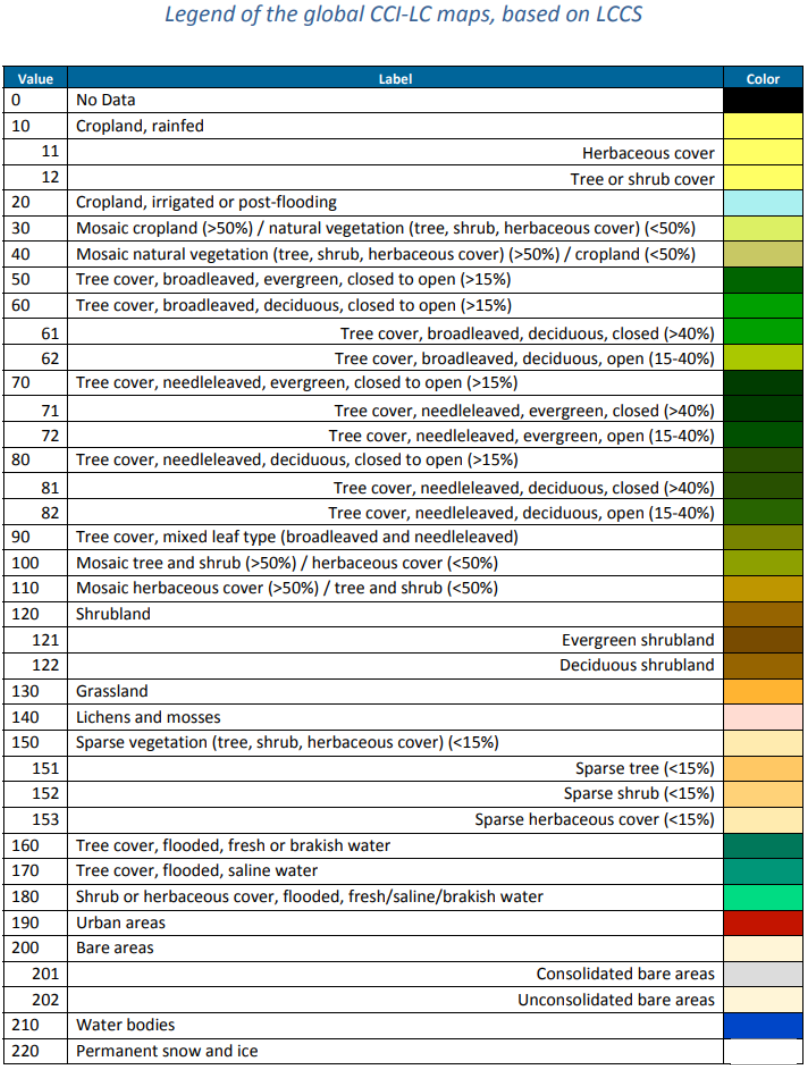